<a href="https://colab.research.google.com/github/DJCordhose/buch-machine-learning-notebooks/blob/master/kap6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kapitel 6: Modellauswahl

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sklearn
print(sklearn.__version__)

1.2.2


In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

## Accuracy

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8, stratify=y)

In [8]:
X_train.shape

(105, 4)

In [9]:
X_test.shape

(45, 4)

In [10]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
clf = svc.fit(X_train, y_train)

In [11]:
y_pred = clf.predict(X_test)

In [12]:
y_pred

array([1, 2, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 1, 2, 2,
       1])

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9555555555555556


## Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


In [15]:
import numpy as np
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_norm)

[[1.         0.         0.        ]
 [0.         0.93333333 0.06666667]
 [0.         0.06666667 0.93333333]]


In [16]:
sns.heatmap?

Object `sns.heatmap` not found.


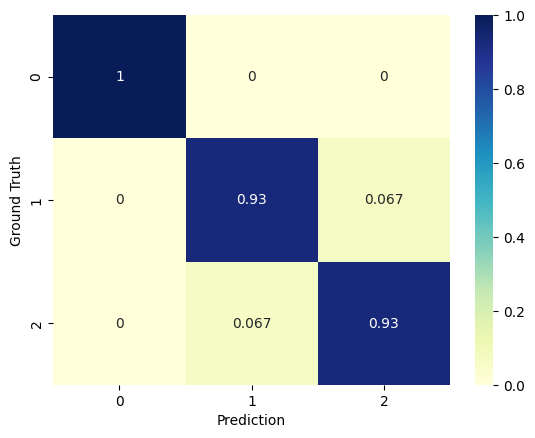

In [17]:
import seaborn as sns
figure = plt.gcf()
ax = figure.add_subplot(111)
sns.heatmap(cm_norm, annot=True, cmap="YlGnBu")
ax.set_xlabel('Prediction')
ax.set_ylabel('Ground Truth');

## Precision-Recall

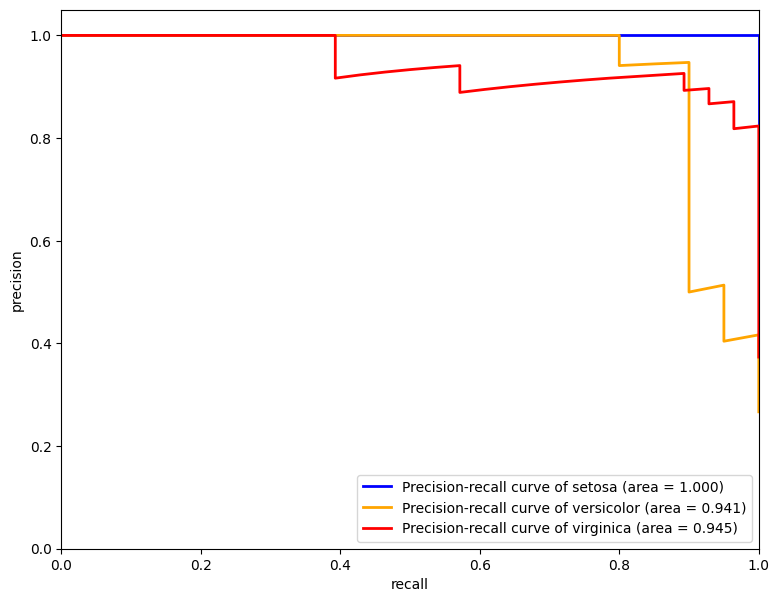

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

colors = ['blue', 'orange', 'red']

iris = load_iris()

X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#random_state = np.random.RandomState(0)
#n_samples, n_features = X.shape
#X = np.c_[X, random_state.randn(n_samples, 500 * n_features)]

#____________________________________________________________________
# training test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)


one_vs_rest = OneVsRestClassifier(SVC(kernel='rbf', C=10, gamma=100, probability=True, random_state=12))
y_score = one_vs_rest.fit(X_train, y_train).decision_function(X_test)
y_true, y_pred = y_test, one_vs_rest.predict(X_test)

precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

#____________________________________________________________________
# Plot Precision-Recall curve for each class
fig = plt.figure(1, figsize=(9, 7))
plt.clf()
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Precision-recall curve of {0} (area = {1:0.3f})'
                   ''.format(iris.target_names[i], average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc="lower right")
plt.show()
# fig.savefig('ML_0604.png', bbox_inches='tight')
# plt.clf()

In [19]:
from sklearn.metrics import classification_report

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

svc = SVC(kernel='rbf', C=1, gamma=1)
clf = svc.fit(X_train, y_train)
y_true, y_pred = y_test, clf.predict(X_test)

print(classification_report(y_true, y_pred, digits=3, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        15
  versicolor      0.933     0.933     0.933        15
   virginica      0.933     0.933     0.933        15

    accuracy                          0.956        45
   macro avg      0.956     0.956     0.956        45
weighted avg      0.956     0.956     0.956        45



## Receiver Operating Characteristic (ROC) Kurve

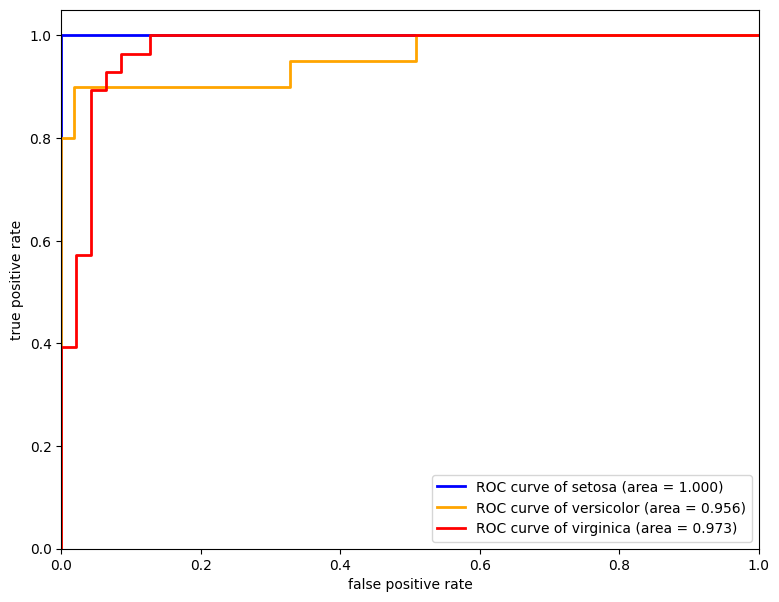

In [20]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

from scipy import interp

colors = ['blue', 'orange', 'red']

iris = load_iris()

X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#random_state = np.random.RandomState(0)
#n_samples, n_features = X.shape
#X = np.c_[X, random_state.randn(n_samples, 500 * n_features)]

#____________________________________________________________________
# training test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)

one_vs_rest = OneVsRestClassifier(SVC(kernel='rbf', C=10, gamma=100, probability=True, random_state=12))
y_score = one_vs_rest.fit(X_train, y_train).decision_function(X_test)
y_true, y_pred = y_test, one_vs_rest.predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#____________________________________________________________________
# Plot Precision-Recall curve for each class
fig = plt.figure(1, figsize=(9, 7))
plt.clf()
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of {0} (area = {1:0.3f})'
                   ''.format(iris.target_names[i], roc_auc[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.show()
# fig.savefig('ML_0603.png', bbox_inches='tight')
# plt.clf()

## Metrik für Regression

In [21]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [22]:
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

X = data[:,5:6]
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=112)

lr = lm.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

In [25]:
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(median_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

48.20396841106558
4.7069613412271085
2.8851215093348284
0.42203569171371


In [26]:
y_train_pred = lr.predict(X_train)

In [27]:
print(mean_squared_error(y_train, y_train_pred))
print(mean_absolute_error(y_train, y_train_pred))
print(median_absolute_error(y_train, y_train_pred))
print(r2_score(y_train, y_train_pred))

41.651020107769185
4.329310287661524
2.8606587005308413
0.5089684947687656


## Validation

In [28]:
iris = load_iris()

X = iris.data
y = iris.target
svc = SVC(kernel='rbf', C=1, gamma=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=12)

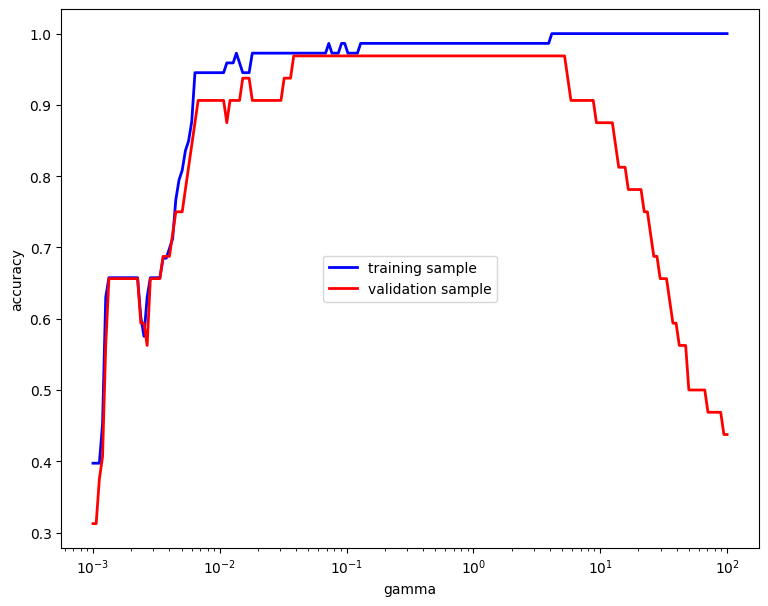

In [29]:
fig = plt.figure(1, figsize=(9, 7))
ax = fig.add_subplot(111)

param_range = np.logspace(-3, 2, 200)
train_scores, val_scores = [], []
for g in param_range:
    svc = SVC(kernel='rbf', C=1, gamma=g)
    clf = svc.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    val_scores.append(clf.score(X_val, y_val))
best_param = param_range[np.argmax(val_scores)]

plt.plot(param_range, train_scores, label="training sample", color="b", lw=2)
plt.plot(param_range, val_scores, label="validation sample", color="r", lw=2)

ax.set_xscale( "log" )
plt.xlabel("gamma")
plt.ylabel("accuracy")
plt.axis("tight")
plt.legend(loc='center')

plt.show()
# fig.savefig('ML_0601.png', bbox_inches='tight')
# plt.clf()

In [30]:
best_param = param_range[np.argmax(val_scores)]
print("Best gamma value:", best_param)

Best gamma value: 0.038274944785163134


In [31]:
svc = SVC(kernel='rbf', C=1, gamma=best_param)
clf = svc.fit(X_train, y_train)
print("Best train accuracy:", clf.score(X_train, y_train))
print("Best val accuracy:", clf.score(X_val, y_val))
print("Best test accuracy:", clf.score(X_test, y_test))

Best train accuracy: 0.9726027397260274
Best val accuracy: 0.96875
Best test accuracy: 0.9555555555555556


## Cross Validation

Train accuracy: 0.981 +/- 0.047
Cross validation accuracy: 0.988 +/- 0.031


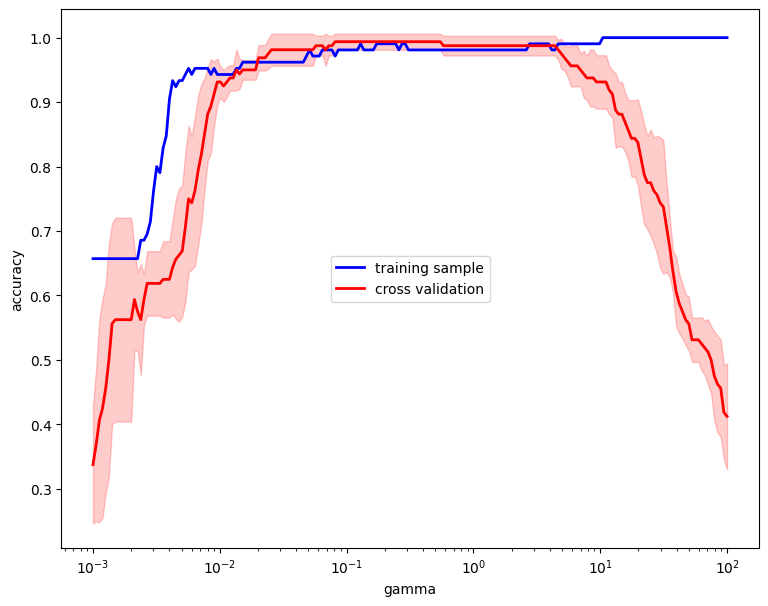

Best gamma value: 0.08119844993184012
Best train accuracy: 0.9714285714285714
Best xval accuracy: 0.99375 +/- 0.012499999999999999
Best test accuracy: 0.9777777777777777


In [32]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

iris = load_iris()

X = iris.data
y = iris.target
clf = SVC(kernel='rbf', C=1, gamma=1)

#print(X.shape, y.shape)
#print(len(X), len(y))

#____________________________________________________________________
# training test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)


#____________________________________________________________________
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Train accuracy: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))


from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=21)
scores = cross_val_score(clf, X_train, y_train, cv=cv)
print("Cross validation accuracy: %0.3f +/- %0.3f" % (scores.mean(), scores.std() * 2))

#____________________________________________________________________
# validation plot
fig = plt.figure(1, figsize=(9, 7))
ax = fig.add_subplot(111)

param_range = np.logspace(-3, 2, 200)
train_scores, xval_scores_mean, xval_scores_std = [], [], []
for g in param_range:
    svc = SVC(kernel='rbf', C=1, gamma=g)
    clf = svc.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    xval_scores_mean.append(cross_val_score(clf, X_train, y_train, cv=cv).mean())
    xval_scores_std.append(cross_val_score(clf, X_train, y_train, cv=cv).std())
xval_scores_mean = np.array(xval_scores_mean)
xval_scores_std = np.array(xval_scores_std)

best_param = param_range[np.argmax(xval_scores_mean)]
best_param_id = np.argmax(xval_scores_mean)

ax.plot(param_range, train_scores, label="training sample", color="b", lw=2)
ax.plot(param_range, xval_scores_mean, label="cross validation", color="r", lw=2)

plt.fill_between(param_range, xval_scores_mean - xval_scores_std,
                 xval_scores_mean + xval_scores_std, alpha=0.2, color="r")

ax.set_xscale( "log" )

plt.xlabel("gamma")
plt.ylabel("accuracy")
plt.axis("tight")
plt.legend(loc='center')

plt.show()
# fig.savefig('ML_0602.png', bbox_inches='tight')
# plt.clf()

#____________________________________________________________________
# best param
print("Best gamma value:", best_param)
svc = SVC(kernel='rbf', C=1, gamma=best_param)
clf = svc.fit(X_train, y_train)
print("Best train accuracy:", clf.score(X_train, y_train))
print("Best xval accuracy:", xval_scores_mean[best_param_id],"+/-", xval_scores_std[best_param_id])

#____________________________________________________________________
# test score
print("Best test accuracy:", clf.score(X_test, y_test))

## Grid-Suche

In [33]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

grid_params = [ {'kernel': ['linear'], 
								  'C': [0.1, 1, 10, 100, 1000]},
                {'kernel': ['rbf'],
                 'gamma': [1E-3, 1E-2, 1E-1, 1E0, 1E1],
                 'C': [0.1, 1, 10, 100]}
              ]
clf = GridSearchCV(SVC(), grid_params, cv=5)
clf.fit(X_train, y_train)

print("Best parameters:",clf.best_params_)
print("Best score:",clf.best_score_)

Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score: 0.980952380952381


## Zufallssuche

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

rand_params = {'kernel': ['rbf'],
               'gamma': uniform(1E-2, 1E0),
               'C': uniform(0.1, 10)
               }
clf = RandomizedSearchCV(SVC(), rand_params, cv=5, n_iter=1000, random_state=112)
clf.fit(X_train, y_train)

print("Best parameters:",clf.best_params_)
print("Best score:",clf.best_score_)

Best parameters: {'C': 0.6480574028240825, 'gamma': 0.8276773821752682, 'kernel': 'rbf'}
Best score: 0.980952380952381
